## Statistics/Visualizations on Final Cohort

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [159]:
cohort_dir = "C:/Users/suzie/Dropbox (MIT)/Spring 2021/6.871 Machine Learning for Healthcare/ml4h_chf_readmissions/phase1_teamA/final_cohort.csv"
cohort_table = pd.read_csv(cohort_dir, low_memory=False, index_col=0)
cohort_table.head()

,subject_id,hadm_id,chronic_dialysis,CHF exacerbation
0,15734973,20475282,False,False
5,11442057,21518990,False,False
11,10072949,20817034,False,False
16,13538405,24822466,False,False
21,10287061,27485182,False,False


In [160]:
final_cohort = cohort_table[(cohort_table.chronic_dialysis == False) & (cohort_table["CHF exacerbation"] == True)]
final_cohort.head()

,subject_id,hadm_id,chronic_dialysis,CHF exacerbation
1155,16477997,25359811,False,True
1215,14959277,28740655,False,True
1668,12849817,27891695,False,True
1784,11508679,25781770,False,True
1829,18151621,25727457,False,True


In [161]:
mimiciv_dir = 'C:/Users/suzie/Dropbox (MIT)/Spring 2021/6.871 Machine Learning for Healthcare/mimic-iv-1.0/'

In [162]:
prescriptions = pd.read_csv(f'{mimiciv_dir}hosp/prescriptions.csv', low_memory=False)
prescriptions.head()

,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [163]:
prescription_cohort = prescriptions[prescriptions['hadm_id'].isin(final_cohort.hadm_id)]

In [164]:
prescription_cohort.head()

,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
203,12315540,27448605,16991147,2172-12-25 10:00:00,2173-01-04 17:00:00,MAIN,Thiamine,002451,1.820047e+08,100mg Tablet,NaN,100,mg,1,TAB,1.0,PO
204,12315540,27448605,50352042,2172-12-25 12:00:00,2172-12-28 07:00:00,MAIN,Influenza Virus Vaccine,064182,5.816009e+10,0.5mL Syringe,NaN,0.5,mL,1,SYR,NaN,IM
205,12315540,27448605,8310361,2172-12-25 12:00:00,2172-12-25 15:00:00,MAIN,Nystatin,009537,4.725004e+08,"500,000 Unit UDCUP",NaN,"500,000",UNIT,1,UDCUP,3.0,PO
206,12315540,27448605,94872752,2172-12-25 12:00:00,2173-01-12 22:00:00,MAIN,Pantoprazole,027462,8.084199e+06,40mg Tablet,NaN,40,mg,1,TAB,1.0,PO
207,12315540,27448605,57351693,2172-12-25 12:00:00,2172-12-25 19:00:00,MAIN,Acetaminophen,004489,1.828448e+08,325mg Tablet,NaN,325-650,mg,1-2,TAB,NaN,PO


In [165]:
route_iv = prescriptions.route.str.contains('IV', case=False, na=False)

In [166]:
prescription_cohort['furosemide'] = (prescription_cohort['drug'].str.contains('furosemide', case=False, na=False) | prescription_cohort['drug'].str.contains('lasix', case=False, na=False)) & ~prescriptions['drug'].str.contains('Desensitization', case=False, na=False)
prescription_cohort['bumetanide'] = (prescription_cohort['drug'].str.contains('bumetanide', case=False, na=False) | prescription_cohort['drug'].str.contains('bumex', case=False, na=False)) & ~prescriptions['drug'].str.contains('Desensitization', case=False, na=False)
prescription_cohort['chlorothiazide'] = (prescription_cohort['drug'].str.contains('chlorothiazide', case=False, na=False) | prescription_cohort['drug'].str.contains('diuril', case=False, na=False)) & ~prescriptions['drug'].str.contains('Desensitization', case=False, na=False) & ~prescriptions['drug'].str.contains('hydrochlorothiazide', case=False, na=False)

<ipython-input-166-1b5f14806e4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescription_cohort['furosemide'] = (prescription_cohort['drug'].str.contains('furosemide', case=False, na=False) | prescription_cohort['drug'].str.contains('lasix', case=False, na=False)) & ~prescriptions['drug'].str.contains('Desensitization', case=False, na=False)
<ipython-input-166-1b5f14806e4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescription_cohort['bumetanide'] = (prescription_cohort['drug'].str.contains('b

In [119]:
# hadm= 25359811
# prescription_cohort[(prescription_cohort.hadm_id == hadm) & (prescription_cohort.furosemide == True)]

In [120]:
np.sum((prescription_cohort.hadm_id == hadm) & (prescription_cohort.furosemide == True)) 

3

In [167]:
final_cohort['furosemide'] = 0
final_cohort['bumetanide'] = 0
final_cohort['chlorothiazide'] = 0

<ipython-input-167-9abdeefcc4f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cohort['furosemide'] = 0
<ipython-input-167-9abdeefcc4f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cohort['bumetanide'] = 0
<ipython-input-167-9abdeefcc4f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [125]:
final_cohort.head()

,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,furosemide,bumetanide,chlorothiazide
1155,16477997,25359811,False,True,0,0,0
1215,14959277,28740655,False,True,0,0,0
1668,12849817,27891695,False,True,0,0,0
1784,11508679,25781770,False,True,0,0,0
1829,18151621,25727457,False,True,0,0,0


In [168]:
for hadm in final_cohort.hadm_id:
    final_cohort.loc[final_cohort['hadm_id'] == hadm, ['furosemide']] = np.sum((prescription_cohort.hadm_id == hadm) & (prescription_cohort.furosemide == True)) 
    final_cohort.loc[final_cohort['hadm_id'] == hadm, ['bumetanide']] = np.sum((prescription_cohort.hadm_id == hadm) & (prescription_cohort.bumetanide == True))
    final_cohort.loc[final_cohort['hadm_id'] == hadm, ['chlorothiazide']] = np.sum((prescription_cohort.hadm_id == hadm) & (prescription_cohort.chlorothiazide == True))

C:\Users\suzie\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [169]:
final_cohort.head()

,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,furosemide,bumetanide,chlorothiazide
1155,16477997,25359811,False,True,3,0,0
1215,14959277,28740655,False,True,5,0,0
1668,12849817,27891695,False,True,4,0,0
1784,11508679,25781770,False,True,2,0,0
1829,18151621,25727457,False,True,6,0,0


In [170]:
print('FBC', len(final_cohort[(final_cohort['furosemide'] > 0) & (final_cohort['bumetanide'] > 0) & (final_cohort['chlorothiazide'] > 0)]))
print('FB', len(final_cohort[(final_cohort['furosemide'] > 0) & (final_cohort['bumetanide'] > 0) & ~(final_cohort['chlorothiazide'] > 0)]))
print('FC', len(final_cohort[(final_cohort['furosemide'] > 0) & ~(final_cohort['bumetanide'] > 0) & (final_cohort['chlorothiazide'] > 0)]))
print('BC', len(final_cohort[~(final_cohort['furosemide'] > 0) & (final_cohort['bumetanide'] > 0) & (final_cohort['chlorothiazide'] > 0)]))
print('F', len(final_cohort[(final_cohort['furosemide'] > 0) & ~(final_cohort['bumetanide'] > 0) & ~(final_cohort['chlorothiazide'] > 0)]))
print('B', len(final_cohort[~(final_cohort['furosemide'] > 0) & (final_cohort['bumetanide'] > 0) & ~(final_cohort['chlorothiazide'] > 0)]))
print('C', len(final_cohort[~(final_cohort['furosemide'] > 0) & ~(final_cohort['bumetanide'] > 0) & (final_cohort['chlorothiazide'] > 0)]))

FBC 228
FB 522
FC 940
BC 18
F 23016
B 97
C 3


In [171]:
sizes = [23016, 97, 3, 522, 940, 18, 228]
np.sum(sizes)

24824

In [172]:
len(final_cohort)

24824

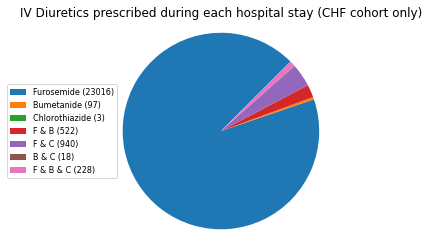

In [174]:
labels = 'Furosemide', 'Bumetanide', 'Chlorothiazide', 'F & B', 'F & C', 'B & C', 'F & B & C'
sizes = [23016, 97, 3, 522, 940, 18, 228]
# percent = sizes/np.sum(sizes)
# explode = [0.05,0.5,0.05,0.05,0.05,0.05,0.05]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
#         explode=explode, 
#         labels=labels, 
#         autopct='%1.1f%%',
#         pctdistance=0.85,
#         labeldistance=1.2,
        shadow=False, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

legend_labels = ['{0} ({1})'.format(i,j) for i,j in zip(labels, sizes)]

# sort_legend = True
# if sort_legend:
#     wedge, text, dummy =  zip(*sorted(zip(wedge, text, y),
#                                           key=lambda x: x[2],
#                                           reverse=True))

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(-0.15, 0.5),
           fontsize=8)
plt.title('IV Diuretics prescribed during each hospital stay (CHF cohort only)')
plt.show()

## Number of Hospitalizations

In [156]:
diagnoses_icd = pd.read_csv(f'{mimiciv_dir}hosp/diagnoses_icd.csv', low_memory=False)
diagnoses_icd.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9


In [192]:
cohort_table.subject_id.value_counts().value_counts().index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  20,  19,  22,  21,  23,  24,  25,  27,
             26,  28,  30,  29,  31,  32,  33,  35,  34,  36,  37,  41,  40,
             44,  39,  38,  49,  42,  48,  47,  43,  53,  64,  46,  50,  51,
             55,  45,  58,  56,  52,  71,  69,  67,  60,  79,  68,  94,  62,
             59,  77,  89,  57,  54,  84,  92,  93,  99, 130,  95,  97,  86,
             98, 129,  88,  70,  85,  82,  80, 142,  76,  75,  65,  63, 185,
            163, 238],
           dtype='int64')

In [234]:
169813/len(cohort_table.subject_id.unique())

0.6656566290091178

<BarContainer object of 93 artists>

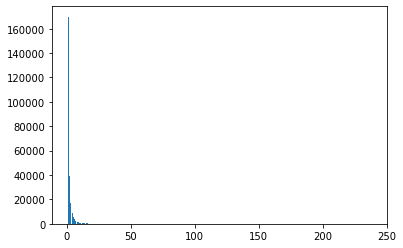

In [197]:
plt.bar(cohort_table.subject_id.value_counts().value_counts().index, cohort_table.subject_id.value_counts().value_counts())

(array([2.08716e+05, 2.61700e+04, 1.46070e+04, 4.43300e+03, 7.41000e+02,
        2.42000e+02, 9.70000e+01, 9.40000e+01]),
 array([  1,   3,   5,  10,  20,  30,  40,  50, 100]),
 <a list of 8 Patch objects>)

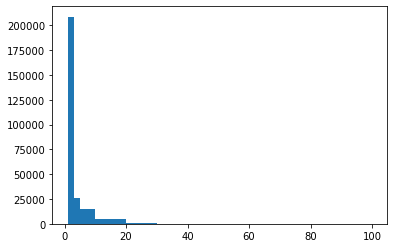

In [201]:
plt.hist(cohort_table.subject_id.value_counts(), bins=[1, 3, 5, 10, 20, 30, 40, 50, 100])

1      169813
2       38903
3       16946
4        9224
5        5502
        ...  
65          1
63          1
185         1
163         1
238         1
Name: subject_id, Length: 93, dtype: int64


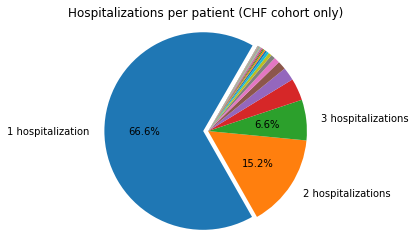

In [238]:

sizes = cohort_table.subject_id.value_counts().value_counts()
print(sizes)
labels = ['']*len(sizes)
labels[0] = '1 hospitalization'
labels[1] = '2 hospitalizations'
labels[2] = '3 hospitalizations'
# percent = sizes/np.sum(sizes)
explode = np.zeros(len(sizes))
explode[0]=0.05
# cohort_table.subject_id.value_counts().value_counts().index, )
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct=lambda x: "{:1.1%}".format(x/100) if x > 5 else '',
#         pctdistance=0.85,
        labeldistance=1.15,
        shadow=False, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# legend_labels = ['{0} ({1})'.format(i,j) for i,j in zip(labels, sizes)]

# sort_legend = True
# if sort_legend:
#     wedge, text, dummy =  zip(*sorted(zip(wedge, text, y),
#                                           key=lambda x: x[2],
#                                           reverse=True))

# plt.legend(legend_labels, loc='center left', bbox_to_anchor=(-0.15, 0.5),
#            fontsize=8)
plt.title('Hospitalizations per patient (CHF cohort only)')
plt.show()

In [239]:
total_hadm = diagnoses_icd.hadm_id.unique()

In [243]:
final_cohort

,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,furosemide,bumetanide,chlorothiazide
1155,16477997,25359811,False,True,3,0,0
1215,14959277,28740655,False,True,5,0,0
1668,12849817,27891695,False,True,4,0,0
1784,11508679,25781770,False,True,2,0,0
1829,18151621,25727457,False,True,6,0,0
...,...,...,...,...,...,...,...
5276007,13356023,22685718,False,True,5,0,0
5278735,11278868,27727945,False,True,2,0,0
5278849,16393972,23399256,False,True,2,0,0
5278908,13246267,23939582,False,True,3,0,0


In [242]:
len(total_hadm)

521111

[496287, 24824]


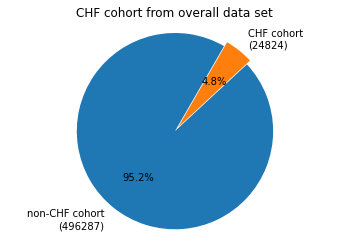

In [252]:

sizes = [len(total_hadm)-len(final_cohort), len(final_cohort)]
print(sizes)
labels = ['']*len(sizes)
labels[1] = 'CHF cohort\n(24824)'
labels[0] = 'non-CHF cohort\n(496287)'
# percent = sizes/np.sum(sizes)
explode = np.zeros(len(sizes))
explode[0]=0.05
# cohort_table.subject_id.value_counts().value_counts().index, )
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct=lambda x: "{:1.1%}".format(x/100) if x > 1 else '',
#         pctdistance=0.85,
        labeldistance=1.15,
        shadow=False, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('CHF cohort from overall data set')
plt.show()